In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filepath = 'processed_csv/'
name = '_processed.csv'
def import_csv(battery_id, ambient_temp):
    dataframe = pd.read_csv((filepath+battery_id+name), index_col = 0)
    dataframe['cell'] = battery_id
    dataframe['ambient_temp'] = ambient_temp
    return dataframe

In [4]:
battery_ids = ['B0005', 'B0006', 'B0007', 'B0018']
dataframes_24 = []
for battery_id in battery_ids:
    dataframes_24.append(import_csv(battery_id, 24))

In [5]:
df_temp_24 = pd.concat(dataframes_24)
df_temp_24.reset_index(inplace=True)
df_temp_24.drop(["index"], axis=1, inplace=True)
df_temp_24.drop(['remaining_cycles','max_temp_C'], axis=1, inplace=True)

In [6]:
battery_ids = ['B0049', 'B0050', 'B0051', 'B0053', 'B0054', 'B0055', 'B0056']
dataframes_4 = []
for battery_id in battery_ids:
    dataframes_4.append(import_csv(battery_id, 4))


In [7]:
df_temp_4 = pd.concat(dataframes_4)
df_temp_4.reset_index(inplace=True)
df_temp_4.drop(["index"], axis=1, inplace=True)
df_temp_4.drop(['remaining_cycles','max_temp_C'], axis=1, inplace=True)
df_temp_4

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,cell,ambient_temp
0,1473.328,16.270513,0.007276,1217.453,-0.000205,988.563,0.858373,B0049,4
1,2291.062,13.741555,0.008361,2234.437,-0.000414,101.656,1.420906,B0049,4
2,2297.109,13.429040,0.007559,2240.031,-0.000571,101.172,1.372852,B0049,4
3,1769.031,14.962434,0.013949,3490.797,0.000369,1291.468,2.378644,B0049,4
4,2197.344,20.530530,0.009691,1589.719,-0.000628,1483.719,1.060536,B0049,4
...,...,...,...,...,...,...,...,...,...
425,328.187,8.905384,0.007373,1828.187,-0.000570,107.250,1.130219,B0056,4
426,NaN,NaN,NaN,1730.437,-0.000521,107.968,1.125872,B0056,4
427,470.609,9.601768,0.006927,1799.062,-0.000531,684.313,1.143011,B0056,4
428,435.406,9.474135,0.007005,1812.281,-0.000524,110.094,1.137273,B0056,4


## Outlier Detection

In [8]:
df_temp_24.corr()

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,ambient_temp
time_for_max_temp_D,1.000000,-0.509937,-0.938845,0.998900,0.951272,0.871524,0.997255,NaN
max_temp_D,-0.509937,1.000000,0.735812,-0.527029,-0.550087,-0.503261,-0.534157,NaN
slope_temp_D,-0.938845,0.735812,1.000000,-0.945828,-0.945628,-0.845329,-0.948982,NaN
time_voltage_measured_below3_D,0.998900,-0.527029,-0.945828,1.000000,0.955940,0.873168,0.999098,NaN
slope_voltage_measured_D,0.951272,-0.550087,-0.945628,0.955940,1.000000,0.845816,0.956260,NaN
time_for_max_temp_C,0.871524,-0.503261,-0.845329,0.873168,0.845816,1.000000,0.869963,NaN
capacity,0.997255,-0.534157,-0.948982,0.999098,0.956260,0.869963,1.000000,NaN
ambient_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 24.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 24.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 24.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


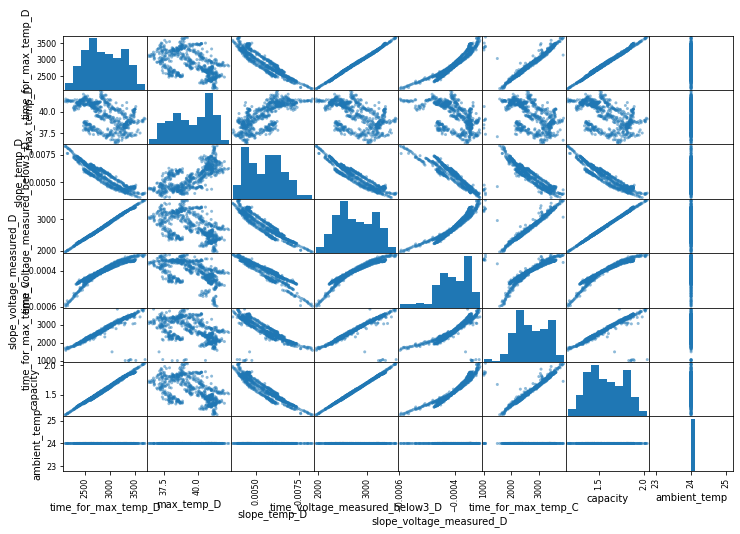

In [9]:
from pandas.plotting import scatter_matrix

attributes = df_temp_24.columns
scatter_matrix(df_temp_24[attributes], figsize=(12,8))
plt.show()

In [10]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, contamination=0.03, warm_start=True)
outlier_locs = clf.fit_predict(df_temp_24[['time_for_max_temp_C', 'capacity']])  # fit the added trees 
print(outlier_locs)

[-1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1

In [11]:
indices = [i for i, x in enumerate(outlier_locs) if x == -1]
indices

[0,
 31,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 199,
 327,
 331,
 332,
 333,
 334,
 335,
 336,
 367,
 504,
 559]

In [12]:
df_temp_24.drop(indices, inplace=True)

In [13]:
df_temp_24

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,cell,ambient_temp
1,3348.735,39.033398,0.004281,3269.688,-0.000341,3447.609,1.846327,B0005,24
2,3329.281,38.818797,0.004231,3250.437,-0.000341,3419.156,1.835349,B0005,24
3,3329.500,38.762305,0.004237,3250.563,-0.000342,3421.593,1.835263,B0005,24
4,3327.531,38.665393,0.004250,3248.766,-0.000342,3395.125,1.834646,B0005,24
5,3329.047,38.751695,0.004274,3250.203,-0.000340,3422.047,1.835662,B0005,24
...,...,...,...,...,...,...,...,...,...
631,2513.250,38.847490,0.006019,2375.953,-0.000462,2217.719,1.362737,B0018,24
632,2487.563,38.802834,0.005931,2377.500,-0.000462,2199.828,1.363405,B0018,24
633,2481.078,38.726991,0.006112,2343.109,-0.000463,2165.250,1.351865,B0018,24
634,2500.703,38.671920,0.006106,2348.656,-0.000465,2195.156,1.354797,B0018,24


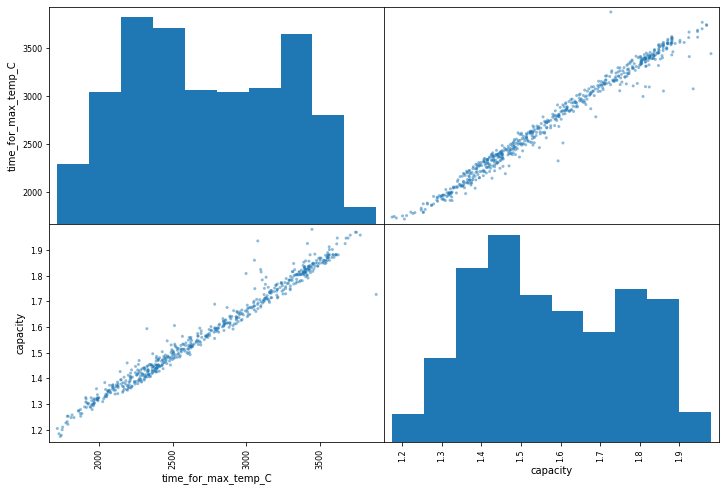

In [14]:
attributes = ['time_for_max_temp_C', 'capacity']
scatter_matrix(df_temp_24[attributes], figsize=(12,8))
plt.show()

In [15]:
df_temp_4.corr()

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,time_for_max_temp_C,capacity,ambient_temp
time_for_max_temp_D,1.000000,0.809569,0.213456,-0.034824,0.100198,0.361708,-0.046922,NaN
max_temp_D,0.809569,1.000000,0.333342,-0.221409,-0.112564,0.275371,-0.045700,NaN
slope_temp_D,0.213456,0.333342,1.000000,-0.076486,-0.143095,0.086473,-0.055517,NaN
time_voltage_measured_below3_D,-0.034824,-0.221409,-0.076486,1.000000,0.327741,-0.146835,0.966607,NaN
slope_voltage_measured_D,0.100198,-0.112564,-0.143095,0.327741,1.000000,0.147687,-0.126335,NaN
time_for_max_temp_C,0.361708,0.275371,0.086473,-0.146835,0.147687,1.000000,-0.189824,NaN
capacity,-0.046922,-0.045700,-0.055517,0.966607,-0.126335,-0.189824,1.000000,NaN
ambient_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 4.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


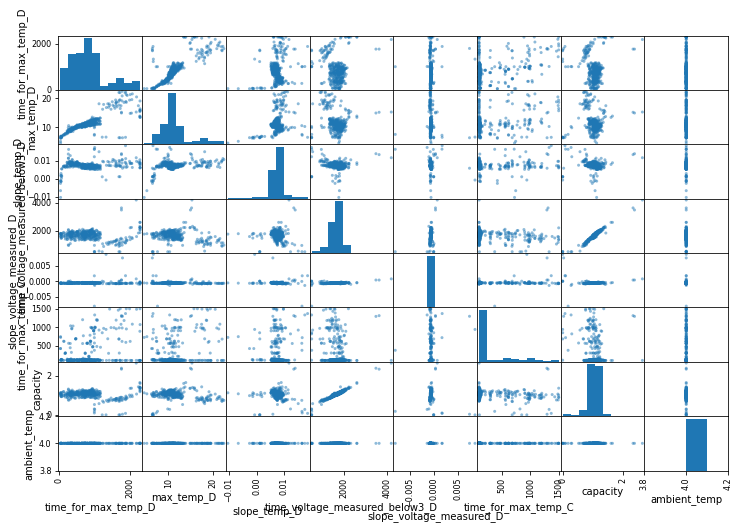

In [16]:
from pandas.plotting import scatter_matrix

attributes = df_temp_4.columns
scatter_matrix(df_temp_4[attributes], figsize=(12,8))
plt.show()

In [17]:
df_temp_4 = pd.concat(dataframes_4)
df_temp_4.reset_index(inplace=True)
df_temp_4.drop(["index"], axis=1, inplace=True)
df_temp_4.drop(['remaining_cycles','max_temp_C', 'time_for_max_temp_C'], axis=1, inplace=True)
df_temp_4.dropna(inplace=True)
df_temp_4.reset_index(inplace=True)
df_temp_4

,index,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp
0,0,1473.328,16.270513,0.007276,1217.453,-0.000205,0.858373,B0049,4
1,1,2291.062,13.741555,0.008361,2234.437,-0.000414,1.420906,B0049,4
2,2,2297.109,13.429040,0.007559,2240.031,-0.000571,1.372852,B0049,4
3,3,1769.031,14.962434,0.013949,3490.797,0.000369,2.378644,B0049,4
4,4,2197.344,20.530530,0.009691,1589.719,-0.000628,1.060536,B0049,4
...,...,...,...,...,...,...,...,...,...
350,424,1023.234,10.990051,0.005295,1783.172,-0.000514,1.153909,B0056,4
351,425,328.187,8.905384,0.007373,1828.187,-0.000570,1.130219,B0056,4
352,427,470.609,9.601768,0.006927,1799.062,-0.000531,1.143011,B0056,4
353,428,435.406,9.474135,0.007005,1812.281,-0.000524,1.137273,B0056,4


In [18]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, contamination=0.1, warm_start=True)
outlier_locs = clf.fit_predict(df_temp_4[['time_for_max_temp_D','max_temp_D','slope_temp_D', 'time_voltage_measured_below3_D', 'slope_voltage_measured_D','capacity']])  # fit the added trees 
print(outlier_locs)

[-1 -1 -1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1 -1 -1
 -1 -1 -1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1

In [19]:
indices = [i for i, x in enumerate(outlier_locs) if x == -1]
df_temp_4.drop(indices, inplace=True)
df_temp_4.corr()


,index,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,ambient_temp
index,1.000000,-0.451535,-0.604975,-0.407092,0.633043,0.642359,0.587550,NaN
time_for_max_temp_D,-0.451535,1.000000,0.926770,0.136657,-0.308526,-0.198726,-0.265342,NaN
max_temp_D,-0.604975,0.926770,1.000000,0.313895,-0.512411,-0.408510,-0.477969,NaN
slope_temp_D,-0.407092,0.136657,0.313895,1.000000,-0.197116,-0.264951,-0.239910,NaN
time_voltage_measured_below3_D,0.633043,-0.308526,-0.512411,-0.197116,1.000000,0.753710,0.960689,NaN
slope_voltage_measured_D,0.642359,-0.198726,-0.408510,-0.264951,0.753710,1.000000,0.797323,NaN
capacity,0.587550,-0.265342,-0.477969,-0.239910,0.960689,0.797323,1.000000,NaN
ambient_temp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 4.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 4.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


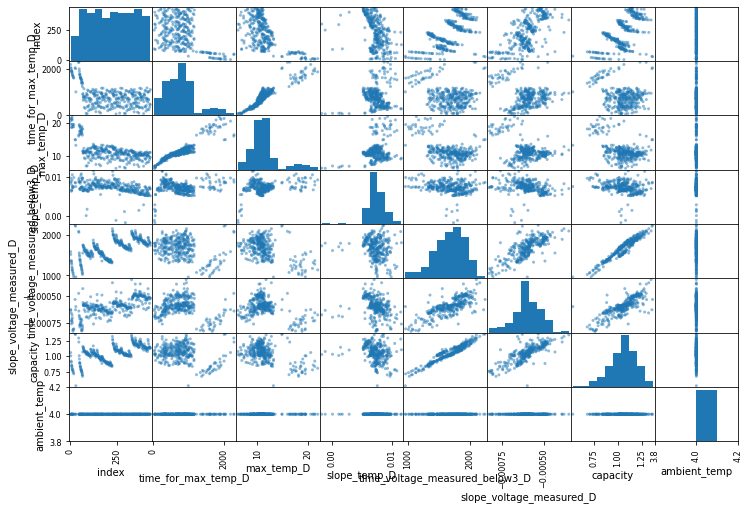

In [20]:
attributes = df_temp_4.columns
scatter_matrix(df_temp_4[attributes], figsize=(12,8))
plt.show()

# Categorical Features

In [21]:
df_all = pd.concat([df_temp_24, df_temp_4])
df_all.drop(['time_for_max_temp_C', 'index'], axis = 1, inplace=True)
df_onehot = pd.get_dummies(df_all.ambient_temp, prefix='ambient_temp')
df_all = df_all.join(df_onehot)
df_all.drop(['ambient_temp'], axis =1, inplace=True)

In [22]:
df_all

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,cell,ambient_temp_4,ambient_temp_24
1,3348.735,39.033398,0.004281,3269.688,-0.000341,1.846327,B0005,0,1
2,3329.281,38.818797,0.004231,3250.437,-0.000341,1.835349,B0005,0,1
3,3329.500,38.762305,0.004237,3250.563,-0.000342,1.835263,B0005,0,1
4,3327.531,38.665393,0.004250,3248.766,-0.000342,1.834646,B0005,0,1
4,3327.531,38.665393,0.004250,3248.766,-0.000342,1.834646,B0005,1,0
...,...,...,...,...,...,...,...,...,...
631,2513.250,38.847490,0.006019,2375.953,-0.000462,1.362737,B0018,0,1
632,2487.563,38.802834,0.005931,2377.500,-0.000462,1.363405,B0018,0,1
633,2481.078,38.726991,0.006112,2343.109,-0.000463,1.351865,B0018,0,1
634,2500.703,38.671920,0.006106,2348.656,-0.000465,1.354797,B0018,0,1


In [23]:
df_all.corr()

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,ambient_temp_4,ambient_temp_24
time_for_max_temp_D,1.000000,0.940505,-0.611355,0.887006,0.823551,0.872621,-0.185357,0.185357
max_temp_D,0.940505,1.000000,-0.480561,0.797736,0.758903,0.773103,-0.173822,0.173822
slope_temp_D,-0.611355,-0.480561,1.000000,-0.731974,-0.709825,-0.743920,0.133203,-0.133203
time_voltage_measured_below3_D,0.887006,0.797736,-0.731974,1.000000,0.942382,0.996137,-0.180245,0.180245
slope_voltage_measured_D,0.823551,0.758903,-0.709825,0.942382,1.000000,0.948225,-0.166502,0.166502
capacity,0.872621,0.773103,-0.743920,0.996137,0.948225,1.000000,-0.173283,0.173283
ambient_temp_4,-0.185357,-0.173822,0.133203,-0.180245,-0.166502,-0.173283,1.000000,-1.000000
ambient_temp_24,0.185357,0.173822,-0.133203,0.180245,0.166502,0.173283,-1.000000,1.000000


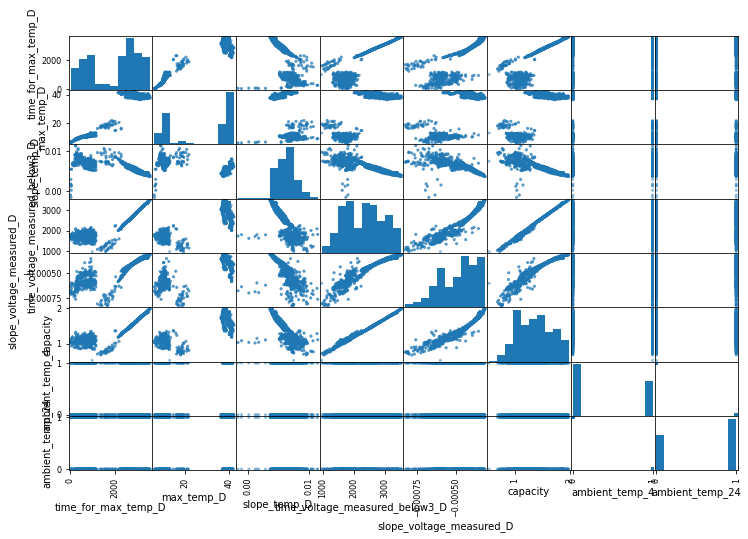

In [24]:
attributes = df_all.columns
scatter_matrix(df_all[attributes], figsize=(12,8))
plt.show()

In [ ]:
pd.pivot_table(df_all, values = 'capacity', index = ['ambient_temp'], columns=['cell'])

In [29]:
pd.pivot_table(df_all, values = 'time_voltage_measured_below3_D', index = ['ambient_temp'], columns=['cell'])

cell,B0005,B0006,B0007,B0018,B0049,B0050,B0051,B0053,B0054,B0055,B0056
ambient_temp,,,,,,,,,,,
4,NaN,NaN,NaN,NaN,1271.1176,1808.645667,1307.54215,1571.795976,1532.031575,1801.909203,1893.710827
24,2748.05262,2677.075323,2916.393151,2727.638318,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
i = df_all[df_all.cell == 'B0050'].index
df_all.drop(i, inplace=True)

## Train/Val/Test Split

In [27]:
from sklearn.model_selection import train_test_split
df_train, df_val_test = train_test_split(df_all, test_size=0.4, random_state=42, stratify=df_all[['cell']])

In [28]:
print(len(df_train), len(df_val_test))

919 613


In [29]:
df_train.cell.value_counts()

B0006    182
B0005    179
B0007    110
B0055     95
B0056     93
B0054     91
B0018     78
B0053     49
B0051     25
B0049     17
Name: cell, dtype: int64

In [30]:
df_train.drop(['cell'], axis = 1, inplace=True)

/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df_train

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D,capacity,ambient_temp_4,ambient_temp_24
418,2978.578,40.856332,0.005637,2862.797,-0.000390,1.616724,0,1
376,3321.844,39.312211,0.004682,3244.375,-0.000351,1.811606,0,1
101,1035.937,12.507648,0.006822,1479.359,-0.000602,1.030415,0,1
150,638.125,11.127294,0.008049,1576.171,-0.000612,0.995507,0,1
435,2894.515,41.020922,0.005876,2778.421,-0.000400,1.570257,0,1
...,...,...,...,...,...,...,...,...
622,2507.047,38.039629,0.006125,2358.422,-0.000463,1.358985,0,1
350,1023.234,10.990051,0.005295,1783.172,-0.000514,1.153909,0,1
48,1756.547,17.468709,0.006956,1470.391,-0.000774,0.901956,0,1
216,390.500,9.371054,0.008804,1845.657,-0.000600,1.089068,0,1


In [32]:
df_val_test.cell.value_counts()

B0006    121
B0005    119
B0007     74
B0055     64
B0056     62
B0054     60
B0018     52
B0053     33
B0051     17
B0049     11
Name: cell, dtype: int64

In [33]:
df_val, df_test = train_test_split(df_val_test, test_size=0.5, random_state=42, stratify=df_val_test[['cell']])

In [34]:
df_val.drop(['cell'], axis = 1, inplace=True)
df_test.drop(['cell'], axis = 1, inplace=True)

/home/hkqai/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
X_train_num = df_train.drop(['capacity', 'ambient_temp_4', 'ambient_temp_24'], axis=1)
X_train_cat = df_train[['ambient_temp_4', 'ambient_temp_24']]
y_train = df_train.capacity
X_val_num = df_val.drop(['capacity', 'ambient_temp_4', 'ambient_temp_24'], axis=1)
X_val_cat = df_val[['ambient_temp_4', 'ambient_temp_24']]
y_val = df_val.capacity
X_test_num = df_test.drop(['capacity', 'ambient_temp_4', 'ambient_temp_24'], axis=1)
X_test_cat = df_test[['ambient_temp_4', 'ambient_temp_24']]
y_test = df_test.capacity

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

# Temperature can be scaled even though it is a categorical variable, as we only have two discrete values
scaler = StandardScaler()
X_train_scaled_num = scaler.fit_transform(X_train_num)
X_test_scaled_num = scaler.transform(X_test_num)
X_val_scaled_num = scaler.transform(X_val_num)

In [37]:
#Combining numerical and categorical x data:
X_train_scaled = np.concatenate((X_train_scaled_num, X_train_cat.to_numpy()), axis=1)
X_val_scaled = np.concatenate((X_val_scaled_num, X_val_cat.to_numpy()), axis=1)
X_test_scaled = np.concatenate((X_test_scaled_num, X_test_cat.to_numpy()), axis=1)

In [38]:
X_train_scaled

array([[ 0.87075701,  0.89245338, -0.39379348, ...,  0.80358022,
         0.        ,  1.        ],
       [ 1.18706668,  0.7823596 , -1.01693721, ...,  1.12410502,
         0.        ,  1.        ],
       [-0.91933038, -1.12877032,  0.37882805, ..., -0.97835585,
         0.        ,  1.        ],
       ...,
       [-0.25530915, -0.77505323,  0.46616856, ..., -2.42685961,
         0.        ,  1.        ],
       [-1.51408188, -1.35240533,  1.67122365, ..., -0.96729139,
         0.        ,  1.        ],
       [-0.96937732, -1.25687391, -0.66773628, ...,  0.41739982,
         0.        ,  1.        ]])

## Model Selection

In [92]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

We perform an initial test using default hyperparameters with all the regressors.

In [93]:
forest_reg = RandomForestRegressor(random_state=42)
extra_reg = ExtraTreesRegressor(random_state=42)
lin_reg = LinearRegression()
elastic_reg = ElasticNet(random_state=42)
lgbm_reg = LGBMRegressor(random_state=42)
xgb_reg = XGBRegressor()
svm_reg = SVR(kernel='linear')
kn_reg = KNeighborsRegressor()


In [94]:
regressor_list = [forest_reg, extra_reg, lin_reg, elastic_reg, lgbm_reg, xgb_reg, svm_reg, kn_reg]
regressor_names = ['random forest', 'extra trees', 'linear regression', 'elastic net', 'lgbm', 'xgb', 'svm', 'KNeighbour']
for regressor, name in zip(regressor_list, regressor_names):
    cv = cross_val_score(regressor, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-cv)
    print('name:{}, scores:{}, mean:{}'.format(name, rmse_scores, rmse_scores.mean()))

name:random forest, scores:[0.0173252  0.0168926  0.01619443 0.01562787 0.01212237], mean:0.01563249611412151
name:extra trees, scores:[0.01250272 0.01538617 0.01601705 0.01447084 0.00919231], mean:0.013513817916690363
name:linear regression, scores:[0.02388481 0.02100983 0.02473268 0.02179836 0.01873392], mean:0.02203192126874576
name:elastic net, scores:[0.31722705 0.30872386 0.29984488 0.29997253 0.32424157], mean:0.31000197801427287
name:lgbm, scores:[0.015231   0.01498608 0.01687534 0.01681042 0.01265031], mean:0.015310631912519279
name:xgb, scores:[0.01663554 0.01626103 0.01704638 0.01700926 0.01107389], mean:0.015605219766524403
name:svm, scores:[0.04351067 0.04110344 0.04399389 0.04230535 0.04218514], mean:0.04261969869073219
name:KNeighbour, scores:[0.02694766 0.03205175 0.03583156 0.03256801 0.02842871], mean:0.031165536896708722


In [45]:
X_train_num

,time_for_max_temp_D,max_temp_D,slope_temp_D,time_voltage_measured_below3_D,slope_voltage_measured_D
418,2978.578,40.856332,0.005637,2862.797,-0.000390
376,3321.844,39.312211,0.004682,3244.375,-0.000351
101,1035.937,12.507648,0.006822,1479.359,-0.000602
150,638.125,11.127294,0.008049,1576.171,-0.000612
435,2894.515,41.020922,0.005876,2778.421,-0.000400
...,...,...,...,...,...
622,2507.047,38.039629,0.006125,2358.422,-0.000463
350,1023.234,10.990051,0.005295,1783.172,-0.000514
48,1756.547,17.468709,0.006956,1470.391,-0.000774
216,390.500,9.371054,0.008804,1845.657,-0.000600


In [48]:
forest_reg.fit(X_train_scaled, y_train)
feature_importances = forest_reg.feature_importances_
feature_names = X_train_num.columns.tolist() + X_train_cat.columns.tolist()
for importance, name in zip(feature_importances, feature_names):
    print('name:{}, importance:{}'.format(name, importance))

name:time_for_max_temp_D, importance:0.22059599965167292
name:max_temp_D, importance:0.0005154534131936492
name:slope_temp_D, importance:0.0010232952411484057
name:time_voltage_measured_below3_D, importance:0.7741418973538675
name:slope_voltage_measured_D, importance:0.003686278270048173
name:ambient_temp_4, importance:1.6614138627703216e-05
name:ambient_temp_24, importance:2.0461931441490414e-05


## Hyperparameter Tuning

Based on our initial analysis, it appears as though the forest and gradient-boosting based regressors performed the best. We'll tune these further.

### Random Forest

In [49]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [72]:
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, random_state=42, cv = 3, verbose=2, n_jobs = -1)
rf_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [80]:
rf_random.best_params_
# RandomForestRegressor(max_depth=100, n_estimators=1400, random_state=42)

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [52]:
from sklearn.metrics import mean_squared_error

def evaluate(model, val_features, val_labels):
    predictions = model.predict(val_features)
    errors = np.sqrt(mean_squared_error(val_labels, predictions))
    print('Model Performance')
    print('Average Error: {:0.10f} Ah'.format(errors))

base_model = RandomForestRegressor(random_state = 42)
base_model.fit(X_train_scaled, y_train)
evaluate(base_model, X_val_scaled, y_val)

best_random = RandomForestRegressor(max_depth=100, n_estimators=1400, random_state=42)
best_random.fit(X_train_scaled, y_train)
evaluate(best_random, X_val_scaled, y_val)


Model Performance
Average Error: 0.0128845458 Ah
Model Performance
Average Error: 0.0125946456 Ah


In [53]:
#Further narrow down using grid search

n_estimators = [1300, 1350, 1400, 1450, 1500]
max_features = [6, 7]
max_depth = [90, 100, 110]
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 2, 3]
bootstrap = [True]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [82]:
rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(estimator = rf, param_grid =param_grid, cv = 3, verbose=2, n_jobs = -1)
rf_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  4.4min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [90, 100, 110],
                         'max_features': [6, 7], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1300, 1350, 1400, 1450, 1500]},
             verbose=2)

In [83]:
rf_grid.best_params_
'''
{'bootstrap': True,
 'max_depth': 90,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1300}
'''

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1300}

In [54]:
grid_rf = RandomForestRegressor(max_depth=90, max_features=6, min_samples_leaf=1, min_samples_split = 2, n_estimators=1300)
grid_rf.fit(X_train_scaled, y_train)
evaluate(grid_rf, X_val_scaled, y_val)


Model Performance
Average Error: 0.0127043088 Ah


## Extra Trees

In [55]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

from pprint import pprint
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [86]:
et = ExtraTreesRegressor(random_state=42)
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 100, random_state=42, cv = 3, verbose=2, n_jobs = -1)
et_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   42.1s finished


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [87]:
et_random.best_estimator_
# ExtraTreesRegressor(max_depth=20, n_estimators=1800, random_state=42)

ExtraTreesRegressor(max_depth=20, n_estimators=1800, random_state=42)

In [57]:
base_model = ExtraTreesRegressor(random_state = 42)
base_model.fit(X_train_scaled, y_train)
evaluate(base_model, X_val_scaled, y_val)

best_random = ExtraTreesRegressor(max_depth=20, n_estimators=1800, random_state=42)
best_random.fit(X_train_scaled, y_train)
evaluate(best_random, X_val_scaled, y_val)

Model Performance
Average Error: 0.0114671444 Ah
Model Performance
Average Error: 0.0112597968 Ah


In [58]:
n_estimators = [1600, 1700, 1750, 1800, 1850, 1900, 2000]
max_features = [4, 5, 6, 7]
max_depth = [10, 15, 20, 25, 30, 40]
min_samples_split = [2]
min_samples_leaf = [1, 2]
bootstrap = [True]
et_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [90]:
et_grid = GridSearchCV(estimator = et, param_grid =et_grid, cv = 3, verbose=2, n_jobs = -1)
et_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 336 candidates, totalling 1008 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1008 out of 1008 | elapsed:  5.0min finished


GridSearchCV(cv=3, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [10, 15, 20, 25, 30, 40],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [2],
                         'n_estimators': [1600, 1700, 1750, 1800, 1850, 1900,
                                          2000]},
             verbose=2)

In [91]:
et_grid.best_params_

{'bootstrap': True,
 'max_depth': 15,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1600}

In [59]:
base_model = ExtraTreesRegressor(random_state = 42)
base_model.fit(X_train_scaled, y_train)
evaluate(base_model, X_val_scaled, y_val)

best_random = ExtraTreesRegressor(max_depth=15, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, random_state=42)
best_random.fit(X_train_scaled, y_train)
evaluate(best_random, X_val_scaled, y_val)

Model Performance
Average Error: 0.0114671444 Ah
Model Performance
Average Error: 0.0113145097 Ah


### lgbm

xgboost

In [65]:
n_estimators = range(50,400,5)
eta = [0.1, 0.2, 0.3, 0.5]
gamma = [0, 0.5, 1, 1.5, 2]
max_depth = [3,4,5,6,7,8,9,10]
min_child_weight = [0.01, 0.05, 0.1]
reg_lambda= [0.5, 1, 2]
reg_alpha = [0, 1, 2]
colsample_bytree = [0.8, 0.9, 1]
xgb_grid = {'eta': eta,
               'gamma': gamma,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'reg_lambda':reg_lambda,
               'reg_alpha': reg_alpha,
               'colsample_bytree':colsample_bytree,
               'n_estimators':n_estimators}

In [72]:
xgb_base = XGBRegressor()
xgb_random = RandomizedSearchCV(xgb_base, param_distributions=xgb_grid, n_iter=200, cv=3, n_jobs=1, random_state=42)
xgb_random.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          scale_pos_weight=None, subsample=None,
                                          tree_method=None,
                                          validat

In [73]:
xgb_random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.200000003, max_delta_step=0, max_depth=7,
             min_child_weight=0.01, missing=nan, monotone_constraints='()',
             n_estimators=360, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
base_model = XGBRegressor(random_state = 42)
base_model.fit(X_train_scaled, y_train)
evaluate(base_model, X_val_scaled, y_val)

best_random = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.200000003, max_delta_step=0, max_depth=7,
             min_child_weight=0.01, monotone_constraints='()',
             n_estimators=360, n_jobs=12, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
best_random.fit(X_train_scaled, y_train)
evaluate(best_random, X_val_scaled, y_val)

Model Performance
Average Error: 0.0119239786 Ah
Model Performance
Average Error: 0.0128329477 Ah


In [78]:
n_estimators = [300, 400, 500]
eta = [0.15,0.2, 0.25]
gamma = [0, 0.1]
max_depth = [6,7,8]
min_child_weight = [0.01]
reg_lambda= [0, 0.5, 1, 5, 10]
reg_alpha = [0, 0.5, 1]
colsample_bytree = [1]
xgb_grid = {'eta': eta,
               'gamma': gamma,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'reg_lambda':reg_lambda,
               'reg_alpha': reg_alpha,
               'colsample_bytree':colsample_bytree,
               'n_estimators':n_estimators}

xgb_grid = GridSearchCV(estimator = xgb_base, param_grid =xgb_grid, cv = 3, verbose=1, n_jobs = 1)
xgb_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:  4.9min finished


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [79]:
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.15, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.150000006, max_delta_step=0, max_depth=8,
             min_child_weight=0.01, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
best_random = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.15, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.150000006, max_delta_step=0, max_depth=8,
             min_child_weight=0.01, monotone_constraints='()',
             n_estimators=300, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
best_random.fit(X_train_scaled, y_train)
evaluate(best_random, X_val_scaled, y_val)

Model Performance
Average Error: 0.0132101669 Ah


lgbm

In [ ]:
base_lgbm = LGBMRegressor()

In [ ]:
n_estimators = [300, 400, 500]
eta = [0.15,0.2, 0.25]
gamma = [0, 0.1]
max_depth = [6,7,8]
min_child_weight = [0.01]
reg_lambda= [0, 0.5, 1, 5, 10]
reg_alpha = [0, 0.5, 1]
colsample_bytree = [1]
lgbm_grid = {'eta': eta,
               'gamma': gamma,
               'max_depth': max_depth,
               'min_child_weight': min_child_weight,
               'reg_lambda':reg_lambda,
               'reg_alpha': reg_alpha,
               'colsample_bytree':colsample_bytree,
               'n_estimators':n_estimators}


## Voting Classifier

In [90]:
from sklearn.ensemble import VotingRegressor
best_rf_reg = RandomForestRegressor(max_depth=100, n_estimators=1400, random_state=42)
best_et_reg = ExtraTreesRegressor(max_depth=15, max_features=7, min_samples_leaf=1, min_samples_split=2, n_estimators=1600, random_state=42)
best_xgb_reg = XGBRegressor(random_state = 42)
voting_reg = VotingRegressor(estimators=[('rf', best_rf_reg), ('et', best_et_reg), ('xgb', best_xgb_reg)])
voting_reg.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=100,
                                                   n_estimators=1400,
                                                   random_state=42)),
                            ('et',
                             ExtraTreesRegressor(max_depth=15, max_features=7,
                                                 n_estimators=1600,
                                                 random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                         

In [91]:
evaluate(voting_reg, X_val_scaled, y_val)

Model Performance
Average Error: 0.0109667804 Ah


## Evaluation

We can evaluate our final voting regressor, as well as the random forest, extra trees, and XGBoost regressors, on the final test set.

In [96]:
final_models = [best_rf_reg, best_et_reg, best_xgb_reg, voting_reg]
names = ['random forest', 'extra trees', 'XGBoost', 'voting regressor']
best_rf_reg.fit(X_train_scaled, y_train)
best_et_reg.fit(X_train_scaled, y_train)
best_xgb_reg.fit(X_train_scaled, y_train)
for model, name in zip(final_models, names):
    print(name)
    evaluate(model, X_test_scaled, y_test)

random forest
Model Performance
Average Error: 0.0135510066 Ah
extra trees
Model Performance
Average Error: 0.0107547501 Ah
XGBoost
Model Performance
Average Error: 0.0135327989 Ah
voting regressor
Model Performance
Average Error: 0.0118080677 Ah


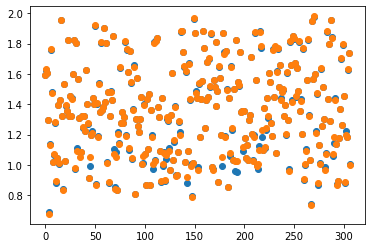

In [98]:
voting_predictions = voting_reg.predict(X_test_scaled)

x = np.arange(0, len(y_test))
plt.scatter(x, voting_predictions)
plt.scatter(x, y_test)
plt.show()

In [99]:
import joblib

In [100]:
joblib.dump(best_rf_reg, "best_rf.pkl")

['best_rf.pkl']

In [101]:
joblib.dump(best_et_reg, "best_et.pkl")
joblib.dump(best_xgb_reg, "best_xgb.pkl")
joblib.dump(voting_reg, "voting.pkl")


['voting.pkl']